<a href="https://colab.research.google.com/github/Prasanthsrinivas/Social_network_advertisements/blob/main/Social_network_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset - This is an incredibly simple dataset that lists customer's ages and salaries and whether or not they were persuaded by advertisements to make a purchase.

In [67]:
!pip install mlxtend

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
df.shape

(400, 3)

In [8]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df=df.drop_duplicates()
df.shape

(367, 3)

In [11]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              367 non-null    int64
 1   EstimatedSalary  367 non-null    int64
 2   Purchased        367 non-null    int64
dtypes: int64(3)
memory usage: 11.5 KB


In [13]:
df.describe()

,Age,EstimatedSalary,Purchased
count,367.000000,367.000000,367.000000
mean,37.722071,70719.346049,0.376022
std,10.681383,34772.173908,0.485047
min,18.000000,15000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,71000.000000,0.000000
75%,46.000000,89000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age'>

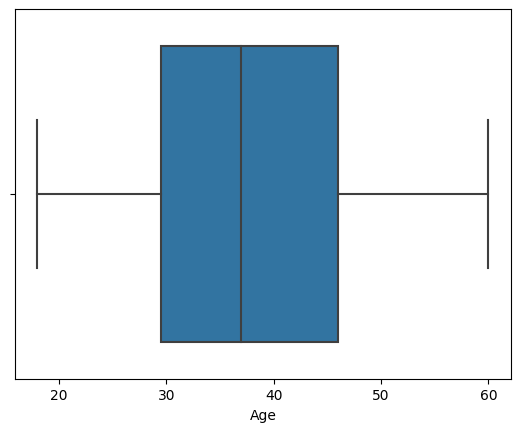

In [84]:
# checking for outliers using boxplot
sns.boxplot(x="Age",data=df)

<Axes: xlabel='EstimatedSalary'>

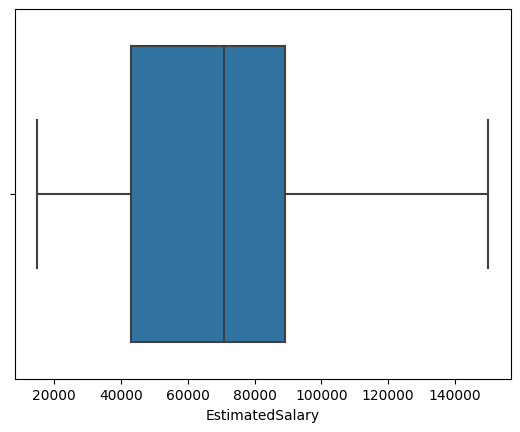

In [85]:
sns.boxplot(x="EstimatedSalary",data=df)

(*or*) using iqr method

In [18]:
iqr=df.Age.quantile(0.75)-df.Age.quantile(0.25)
upperthreshold=df.Age.quantile(0.75)+(1.5*iqr)
lowerthreshold=df.Age.quantile(0.25)-(1.5*iqr)
upperthreshold,lowerthreshold

(70.75, 4.75)

In [19]:
iqr=df.EstimatedSalary.quantile(0.75)-df.EstimatedSalary.quantile(0.25)
upperthreshold=df.EstimatedSalary.quantile(0.75)+(1.5*iqr)
lowerthreshold=df.EstimatedSalary.quantile(0.25)-(1.5*iqr)
upperthreshold,lowerthreshold

(158000.0, -26000.0)

In [64]:
target=df["Purchased"].value_counts()

<Axes: title={'center': 'targetcounts'}>

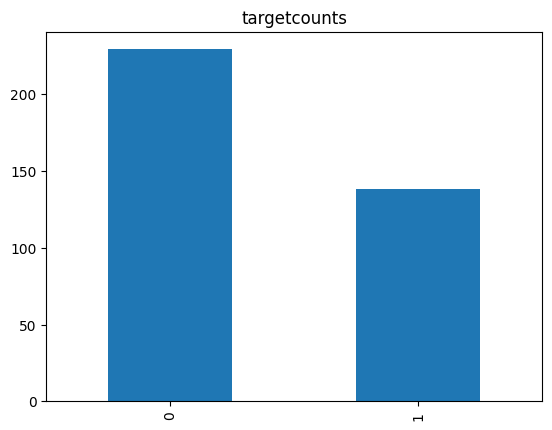

In [65]:
target.plot(kind="bar",title="targetcounts")

In [72]:
#splitting
from sklearn.model_selection import train_test_split
x=df[["Age","EstimatedSalary"]].values
y=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape

((293, 2), (74, 2))

In [26]:
y_train.shape,y_test.shape

((293,), (74,))

In [30]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [70]:
#model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
np.mean(cross_val_score(knn,x_train,y_train,cv=10))

0.8806896551724138

k-value 1  acc-score :  0.9931740614334471  cross-val-score :  0.7682758620689655


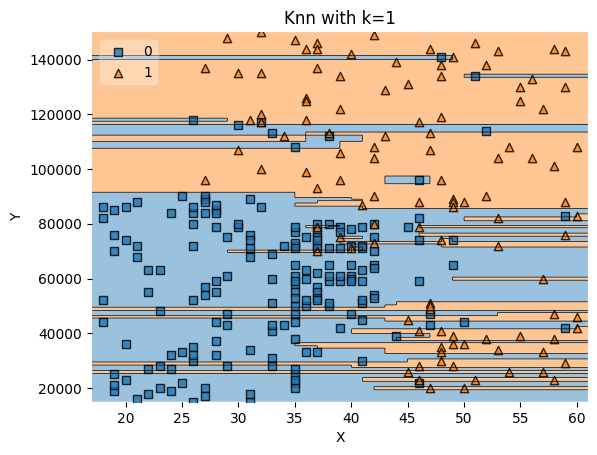

k-value 2  acc-score :  0.8771331058020477  cross-val-score :  0.7408045977011495


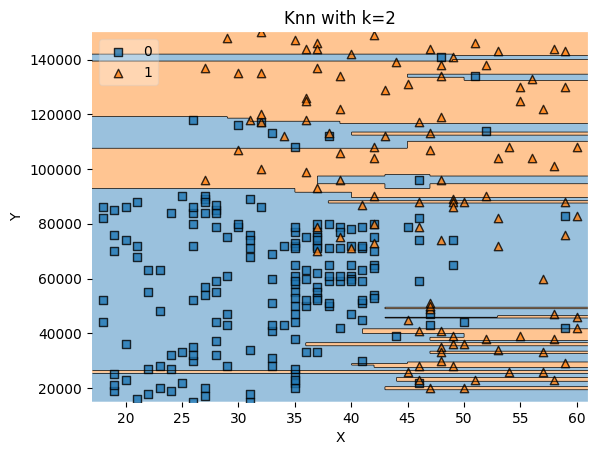

k-value 3  acc-score :  0.8839590443686007  cross-val-score :  0.7848275862068965


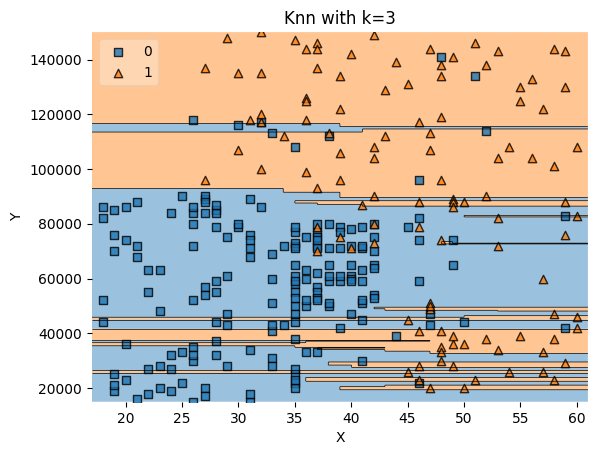

k-value 4  acc-score :  0.8498293515358362  cross-val-score :  0.7777011494252875


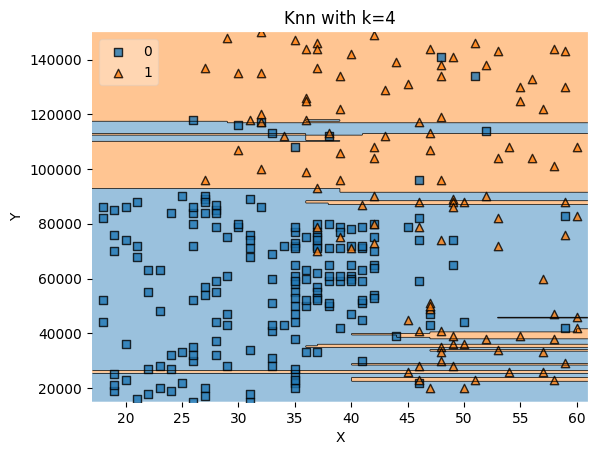

k-value 5  acc-score :  0.8430034129692833  cross-val-score :  0.7847126436781608


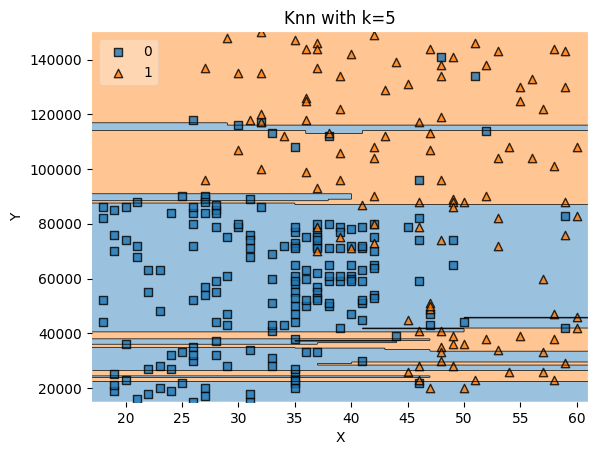

k-value 6  acc-score :  0.8225255972696246  cross-val-score :  0.7813793103448277


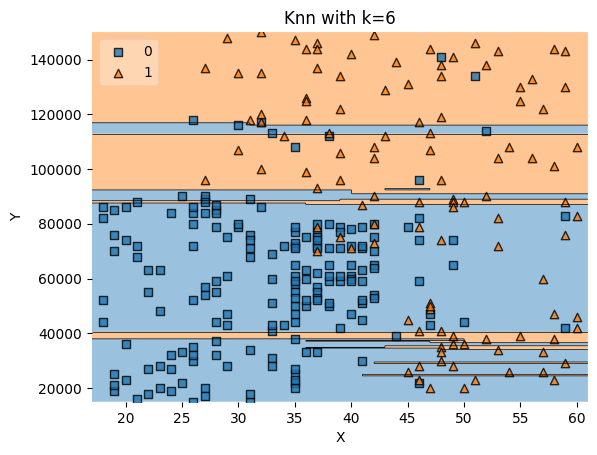

k-value 7  acc-score :  0.8225255972696246  cross-val-score :  0.8052873563218391


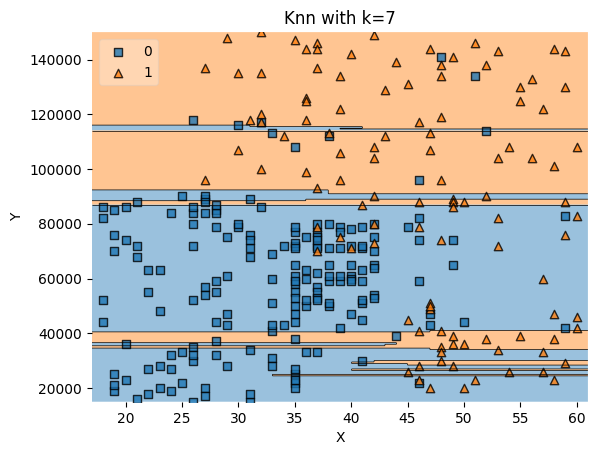

k-value 8  acc-score :  0.825938566552901  cross-val-score :  0.7779310344827587


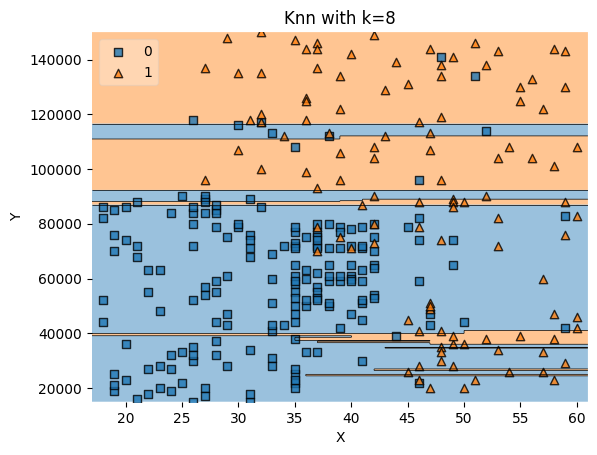

k-value 9  acc-score :  0.8293515358361775  cross-val-score :  0.7949425287356322


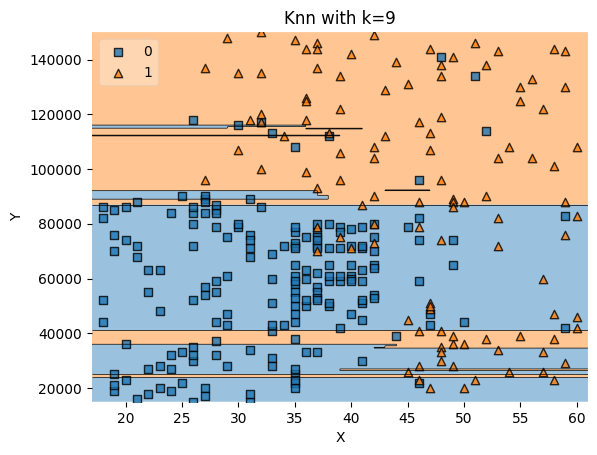

k-value 10  acc-score :  0.8327645051194539  cross-val-score :  0.7916091954022988


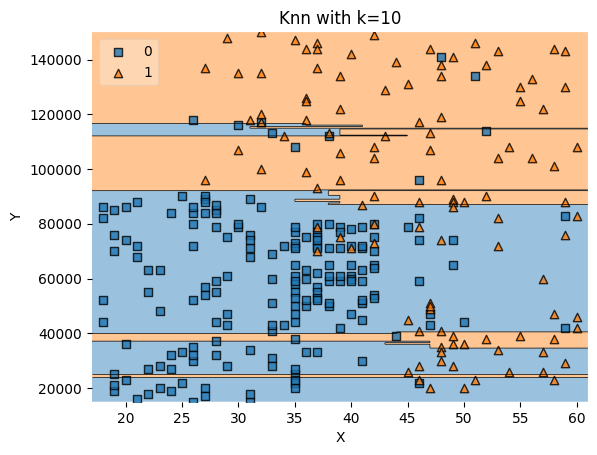

k-value 20  acc-score :  0.78839590443686  cross-val-score :  0.7880459770114943


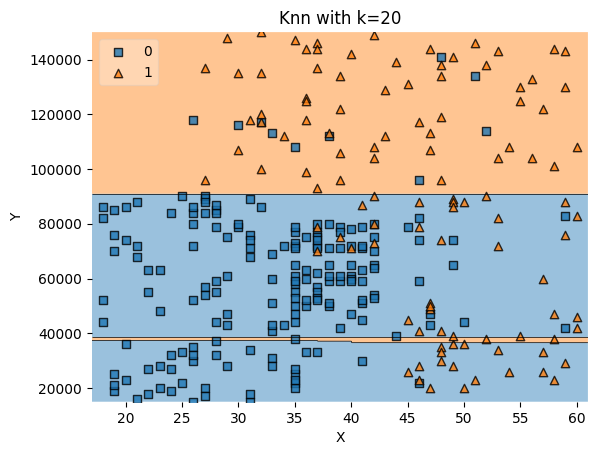

k-value 50  acc-score :  0.7815699658703071  cross-val-score :  0.7777011494252873


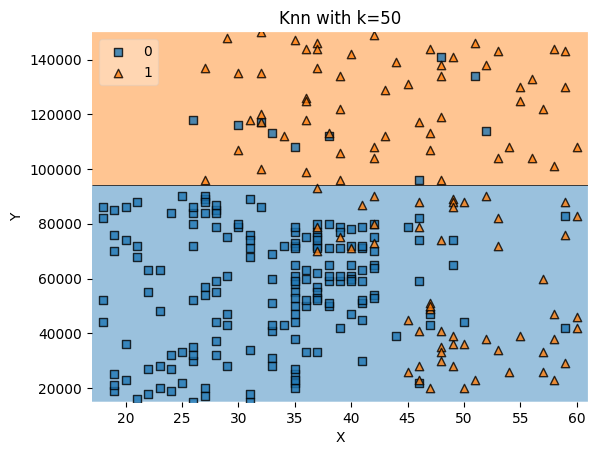

In [82]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("k-value",i," acc-score : ",knn.score(x_train,y_train)," cross-val-score : ",np.mean(cross_val_score(knn,x_train,y_train,cv=10)))
  plot_decision_regions(x_train,y_train.to_numpy(), clf=knn,legend=2)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Knn with k="+str(i))
  plt.show()



Here K=20 has the highest cross validation score and k=20 is best hyper parameter

In [57]:
print(knn.predict(scaler.transform([[30,87000]])))

[0]


In [41]:
knn.predict(scaler.transform([[25,20000]]))

array([0])

In [39]:
knn.predict(scaler.transform([[60,60000]]))

array([1])

In [43]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1])

0.8918918918918919

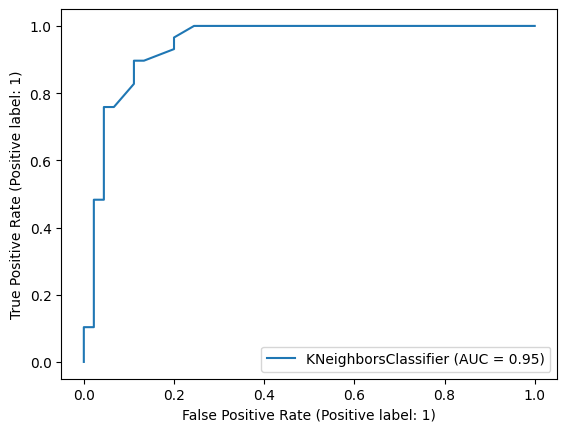

In [63]:
#metrics-it is a classification problem so choose accuracy ,f1 score,auroc
from sklearn.metrics import accuracy_score,f1_score,RocCurveDisplay
RocCurveDisplay.from_estimator(knn,x_test,y_test)
accuracy_score(y_test,y_pred)

AUROC-0.95 --> ie our model performing very good
Auroc score ranges from 0 to 1